In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


In [2]:
df=pd.read_csv("../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")# reading the file 

In [3]:
df.head() # Finding the head

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull() # False means there is no null , true means yes there is null values 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
print(df.shape) # Shape of the data row=614 whereas columns is 13

(614, 13)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum() # to find the null values 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.head() # Again check the data , even this step is not required. You can skip this step 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.duplicated().any() # Find the duplicate values we have or not ( here there is no duplicate values) 

False

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The percentage of Y class : 0.69
The percentage of N class : 0.31


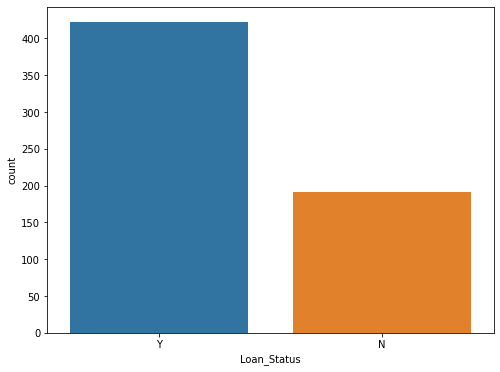

In [10]:
# Now we will find the status percentage of loan 
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f'%(df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f'%(df['Loan_Status'].value_counts()[1] / len(df)))

In [11]:
# Now we will find the columns name to understand the data 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df.drop('Loan_ID',axis=1, inplace=True) 
#axis = 1 means we are dealing with column
# When inplace = True is used, it performs operation on data and 
#nothing is returned. When inplace=False is used, it performs operation 
#on data and returns a new copy of data

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


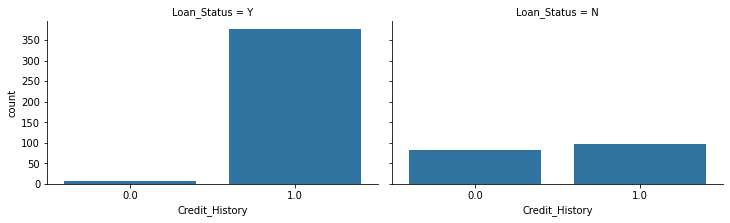

In [15]:
grid=sns.FacetGrid(df,col="Loan_Status",size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History');

# In the below figure dataset  we can say we did not give to the loan person having o credit history 
# But give to loan person having 1 credit history 
# Moreover we can simply say , we most of the people get loan whom do they have credit history 1 and most of 
#Most of the people didn't get loan those do have 0 credit history.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


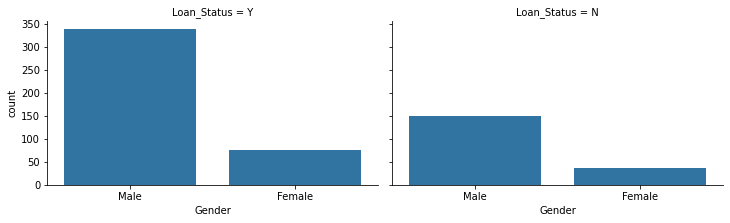

In [16]:

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot,'Gender');
# Here most the male and female got the loan , gender feature is not important

In [17]:
len(df["Gender"]) # get to know what is number of gender 

614

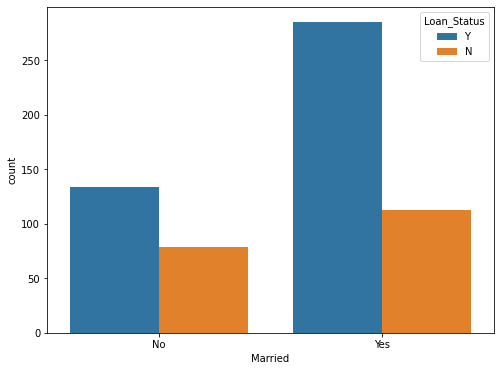

In [18]:
# Checking the people with married status get loan or not 
plt.figure(figsize=(8,6))
sns.countplot(x="Married", hue="Loan_Status",data=df);


# We can see in the plot ,those persons got married have higher chances to get loan
# This feature is important


In [19]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

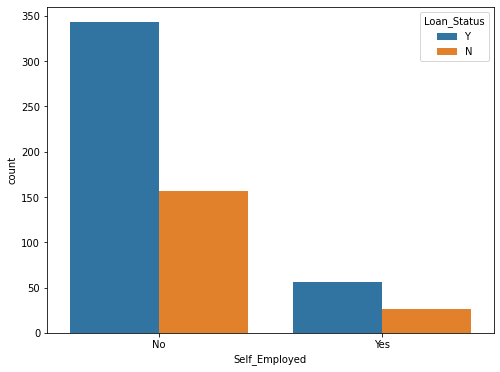

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


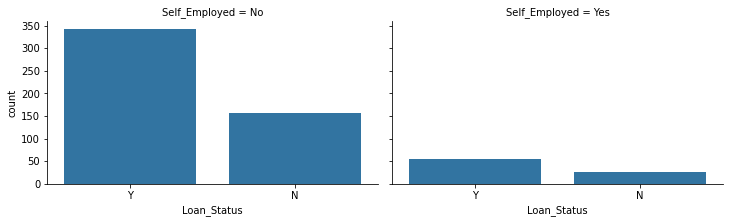

In [21]:
grid=sns.FacetGrid(df,col="Self_Employed",size =3.2, aspect=1.6)
grid.map(sns.countplot,'Loan_Status');
# Self employed people get less loan , we can canclude from graph

In [22]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


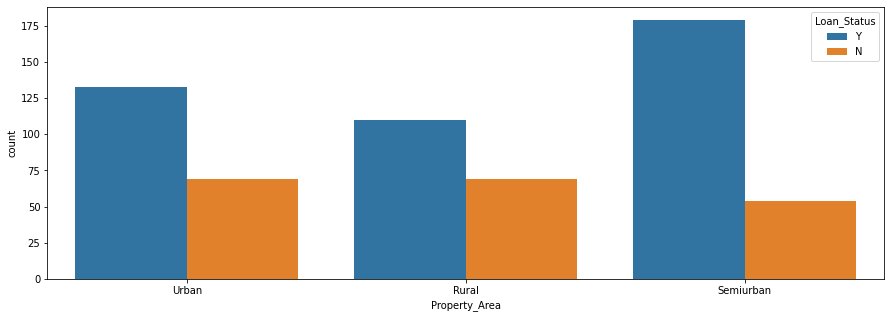

In [23]:
# Based on the property area , we will analyze from the figure Urban areas having high loan status,where as rural area have high chances of getting loan , semiurban areas rejection of getting loan have higher chances.
plt.figure(figsize=(15,5))
sns.countplot(x="Property_Area", hue="Loan_Status",data=df);

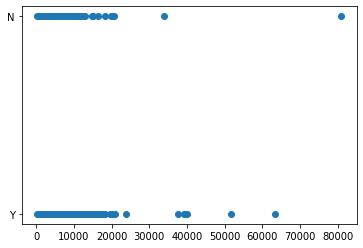

In [24]:
# Now we will find the relationship between Applicant income 
# As there is no relationship between applicantincome and loan get 
plt.scatter(df['ApplicantIncome'], df['Loan_Status']);


In [25]:
# Next step to find the median of the data ,we are taking median because only through ...
# this outiler can be reomved 
df.groupby("Loan_Status").median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


### Processing the data before  writing the algorithm. 

### Find the missing value 

In [26]:
df.isnull().sum() # simple way to find the null values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df.isnull().sum().sort_values(ascending=False) # then finding in the descending way 

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

### Seperate the numerical and categorical data 

In [28]:
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])
        

In [29]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [30]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [31]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [32]:
# cat_data
# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [33]:
# num_data
# fill every missing value with their previous value in the same column
# if th data is missing , it could be filled  with the previous value of the same column

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data

False

### Now we will make the value does not have numerical , so we label those.
### Label Encoder 

In [34]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [35]:
# Next step to change the target column 
target_values = {'Y':0,'N':1}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_values)

In [36]:
# Trasform other categories 
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])

In [37]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [38]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2


In [39]:
df=pd.concat([cat_data, num_data,target], axis=1)

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,1
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,0


### Train the data 
##### Move forward to know the train the data.
##### We are going to use stratifiedshuffleSplit 

In [41]:
X=pd.concat([cat_data,num_data],axis=1)
y=target

In [42]:
# we will use StratifiedShuffleSplit to split the data Taking into consideration that we will get the same ratio on the target column

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [43]:
# we will use 4 different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

# we can see that best model is LogisticRegression at least for now, SVC is just memorizing the data so it is overfitting .

build functions
we are going to build 3 functions :
1) loss : to evaluate our models

precision
recall
f1
log_loss
accuracy_score
2) train_eval_train : to evaluate our models in the same data that we train it on .

3) train_eval_cross : to evaluate our models using different data that we train the model on .

StratifiedKFold
so you may ask why we don't just train our model and evaluate it without building this functions ?
actually you can do that,but mostly your model will not work good at beginning, so you need to change something about your data to improve your accuracy , by changing i mean data processing, and every step you will make, you should evaluate your model to see if it is improving or not, so to not do this step every time, this functions will make life easy as you go :)

In [44]:
# loss 
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [45]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

# we can see that best model is LogisticRegression at least for now, SVC is just memorizing the data so it is overfitting .

LogisticRegression :
  pre: 0.872
  rec: 0.442
  f1: 0.586
  loss: 6.753
  acc: 0.804
------------------------------
KNeighborsClassifier :
  pre: 0.667
  rec: 0.364
  f1: 0.471
  loss: 8.863
  acc: 0.743
------------------------------
SVC :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 10.692
  acc: 0.690
------------------------------
DecisionTreeClassifier :
  pre: 0.870
  rec: 0.435
  f1: 0.580
  loss: 6.823
  acc: 0.802
------------------------------


In [46]:
X_train.shape

(491, 11)

In [47]:
# train_eval_cross
# in the next cell i will be explaining this function

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

# ohhh, as i said SVC is just memorizing the data, and you can see that here DecisionTreeClassifier is better than LogisticRegression

LogisticRegression :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

 pre     0.839606
 rec     0.435833
 f1      0.561412
 loss    6.964165
 acc     0.798367
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.379834
 rec      0.207500
 f1       0.259954
 loss    12.381887
 acc      0.641510
Name: 0, dtype: float64
------------------------------
SVC :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.043955
 acc      0.680245
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------


In [48]:
# some explanation of the above function

x = []
idx = [' pre', ' rec', ' f1', ' loss', ' acc']

# we will use one model
log = LogisticRegression()

for train, test in skf.split(X_train, y_train):
    log.fit(X_train.iloc[train], y_train.iloc[train])
    ls = loss(y_train.iloc[test], log.predict(X_train.iloc[test]), retu=True)
    x.append(ls)
    
# thats what we get
pd.DataFrame(x, columns=idx)

# (column 0 represent the precision_score of the 10 folds)
# (row 0 represent the (pre, rec, f1, loss, acc) for the first fold)
# then we should find the mean of every column
# pd.DataFrame(x, columns=idx).mean(axis=0)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,pre,rec,f1,loss,acc
0,0.875000,0.437500,0.583333,6.907771,0.800000
1,0.714286,0.333333,0.454545,8.458508,0.755102
2,0.888889,0.533333,0.666667,5.639000,0.836735
3,0.428571,0.200000,0.272727,11.278033,0.673469
4,1.000000,0.466667,0.636364,5.638984,0.836735
5,0.857143,0.400000,0.545455,7.048746,0.795918
6,0.923077,0.800000,0.857143,2.819508,0.918367
7,0.909091,0.625000,0.740741,4.934127,0.857143
8,0.800000,0.250000,0.380952,9.163365,0.734694
9,1.000000,0.312500,0.476190,7.753603,0.775510


## Next Step to improve the model 
#### Feature engineering 

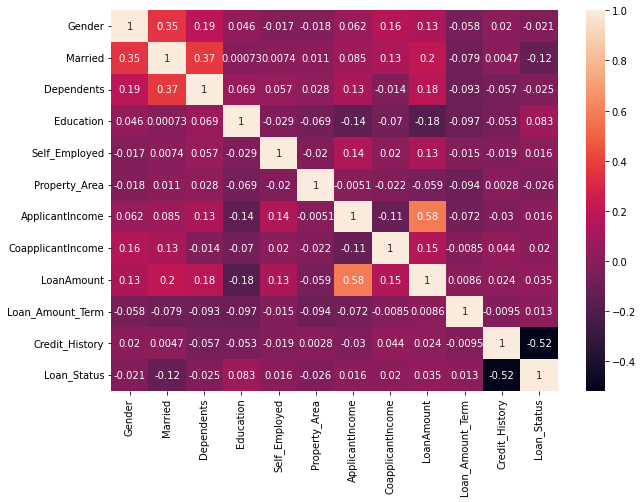

In [49]:
# ooh, we got it right for most of the features, as you can see we've say at the first of the kernel ,
# that Credit_Histroy and Married etc, are good features, actually Credit_Histroy is the best .

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# here we got 58% similarity between LoanAmount & ApplicantIncome 
# and that may be bad for our model so we will see what we can do


In [50]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
415,0,0,0,0,0,2,2995.0,0.0,60.0,360.0,1.0
26,1,1,0,0,0,1,2799.0,2253.0,122.0,360.0,1.0
394,1,1,2,0,0,2,3100.0,1400.0,113.0,360.0,1.0
584,1,1,1,0,0,0,2787.0,1917.0,146.0,360.0,0.0
86,1,1,2,1,0,1,3333.0,2000.0,99.0,360.0,1.0


In [51]:
# I will try to make some operations on some features, here I just tried diffrent operations on diffrent features,
# having experience in the field, and having knowledge about the data will also help

X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


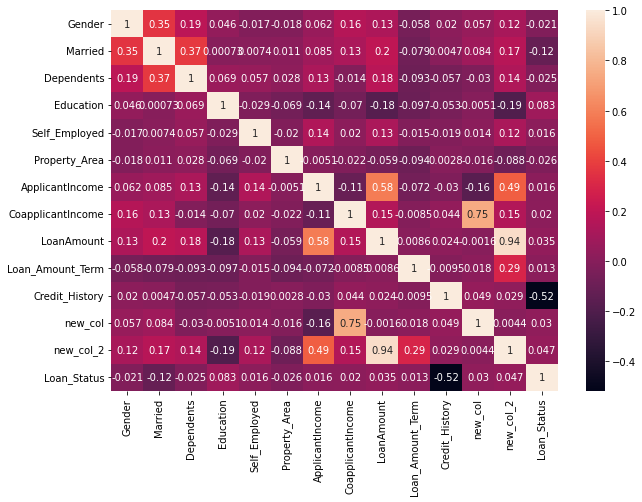

In [52]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# new_col 0.03 , new_col_2, 0.047
# not that much , but that will help us reduce the number of features

In [53]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
train_eval_cross(models, X_train, y_train, skf)

# ok, SVC is improving, but LogisticRegression is overfitting
# i wan't change nothing so we can see what will happen as we go

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

LogisticRegression :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.313095
 rec      0.169167
 f1       0.218420
 loss    12.880939
 acc      0.627061
Name: 0, dtype: float64
------------------------------
SVC :


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------


In [55]:
# first lets take a look at the value counts of every label

for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')


1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married, dtype: int64
------------------------------------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    428
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    414
0.0     77
Name: Credit_History, dtype: int64
------------------------------------------------
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: new_col, Length: 270, dtype: int64
------------------------------------------------
43200.0     18


### We will work on the features that have varied values 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level func

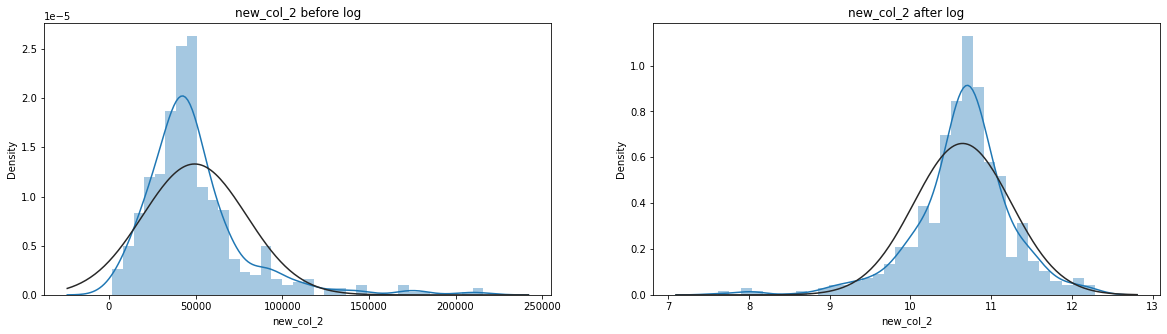

In [56]:
# new_col_2

# we can see we got right_skewed
# we can solve this problem with very simple statistical teqniq , by taking the logarithm of all the values
# because when data is normally distributed that will help improving our model

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [57]:
# now we will evaluate our models, and i will do that continuously ,so i don't need to mention that every time

train_eval_cross(models, X_train, y_train, skf)

# wooow our models improved really good by just doing the previous step

LogisticRegression :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 pre     0.833415
 rec     0.442500
 f1      0.566908
 loss    6.893677
 acc     0.800408
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.653184
 rec     0.330000
 f1      0.424224
 loss    9.214145
 acc     0.733224
Name: 0, dtype: float64
------------------------------
SVC :


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

 pre     0.698095
 rec     0.233750
 f1      0.345269
 loss    8.727747
 acc     0.747306
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [58]:
# new_col

# most of our data is 0 , so we will try to change other values to 1

print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: new_col, Length: 270, dtype: int64
--------------------------------------------------

after:
1.0    269
0.0    222
Name: new_col, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
train_eval_cross(models, X_train, y_train, skf)

# ok we are improving our models as we go

LogisticRegression :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 pre     0.850155
 rec     0.435833
 f1      0.561183
 loss    6.893676
 acc     0.800408
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.665000
 rec     0.272500
 f1      0.368686
 loss    9.497496
 acc     0.725020
Name: 0, dtype: float64
------------------------------
SVC :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 pre     0.667976
 rec     0.273333
 f1      0.385303
 loss    8.444391
 acc     0.755510
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [60]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')
    
# looks better

1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married, dtype: int64
------------------------------------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    428
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    414
0.0     77
Name: Credit_History, dtype: int64
------------------------------------------------
1.0    269
0.0    222
Name: new_col, dtype: int64
------------------------------------------------
10.673596    18
10.586584    13
10.961278    11
10.491274    11
10.738134     9
             ..
11.643954     1
10.595634     1
9.856396      1
9.963641      1
12.100712     1
Name: 

### Outliers
 #### there is different techniques to handle outliers, here we are going to use 


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


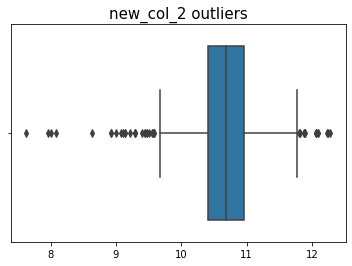

In [61]:
# we will use boxplot to detect outliers

sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [62]:
threshold = 1.5  # this number is hyper parameter , as much as you reduce it, as much as you remove more points
                 # you can just try different values the deafult value is (1.5) it works good for most cases
                 # but be careful, you don't want to try a small number because you may loss some important information from the data .
                 
            
new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.416008100285975 , Quartile 75: 10.961277846683982
iqr: 0.5452697463980076
Cut Off: 0.8179046195970114
Lower: 9.598103480688962
Upper: 11.779182466280993
Nubers of Outliers: 39
outliers:[12.092679958175083, 8.930626469173578, 7.620705086838262, 12.254862809699606, 7.965545573129992, 9.574983485564092, 9.392661928770137, 9.578311275656766, 9.587406005562649, 9.112948025967533, 8.006367567650246, 9.144200569471638, 9.287301413112312, 9.441452092939569, 9.287301413112312, 12.059890135352092, 8.626944055375356, 9.51044496442652, 11.81569317484005, 9.441452092939569, 8.922658299524402, 9.287301413112312, 11.889991098556695, 12.059890135352092, 12.059890135352092, 12.231740392278752, 9.469622969906265, 9.137769679141348, 11.799607037088427, 9.084777149000837, 9.21830854162536, 8.99961934066053, 8.083328608786376, 12.283033686666302, 9.549665677579801, 11.877568578558138, 11.877568578558138, 12.100712129872347, 9.441452092939569]

len X_train before dropping the outliers 491
le

In [63]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


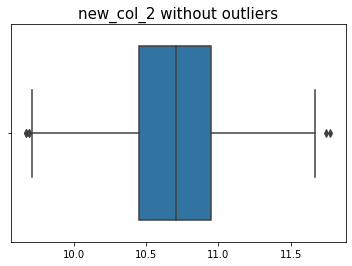

In [64]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

# good :)

In [65]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 pre     0.849838
 rec     0.457143
 f1      0.587149
 loss    6.654157
 acc     0.807343
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.687262
 rec     0.314286
 f1      0.424965
 loss    8.874999
 acc     0.743043
Name: 0, dtype: float64
------------------------------
SVC :


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

 pre     0.395000
 rec     0.135714
 f1      0.201754
 loss    9.624147
 acc     0.721353
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.861742
 rec     0.457143
 f1      0.589530
 loss    6.577402
 acc     0.809565
Name: 0, dtype: float64
------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

### features selection

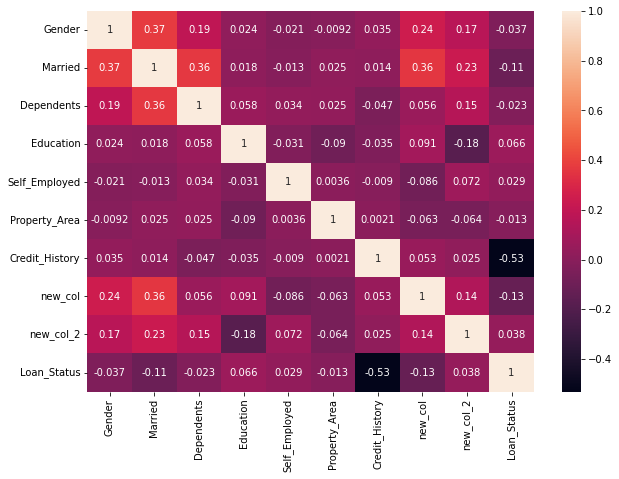

In [66]:
# Self_Employed got really bad corr (-0.00061) , let's try remove it and see what will happen

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [67]:
#X_train.drop(['Self_Employed'], axis=1, inplace=True)

train_eval_cross(models, X_train, y_train, skf)

# looks like Self_Employed is not important
# KNeighborsClassifier improved

# droping all the features Except for Credit_History actually improved KNeighborsClassifier and didn't change anything in other models
# so you can try it by you self
# but don't forget to do that on testing data too

#X_train.drop(['Self_Employed','Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)

LogisticRegression :


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

 pre     0.849838
 rec     0.457143
 f1      0.587149
 loss    6.654157
 acc     0.807343
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.687262
 rec     0.314286
 f1      0.424965
 loss    8.874999
 acc     0.743043
Name: 0, dtype: float64
------------------------------
SVC :


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

 pre     0.395000
 rec     0.135714
 f1      0.201754
 loss    9.624147
 acc     0.721353
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.861742
 rec     0.457143
 f1      0.589530
 loss    6.577402
 acc     0.809565
Name: 0, dtype: float64
------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

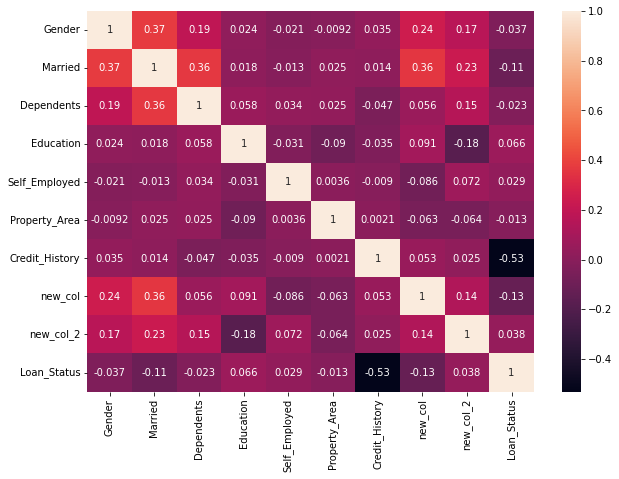

In [68]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

### Evalaute the model on test_data

In [69]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
182,1,1,0,0,0,1,4600.0,0.0,73.0,180.0,1.0
440,1,0,0,0,0,1,3660.0,5064.0,187.0,360.0,1.0
276,1,1,0,0,0,1,3993.0,3274.0,207.0,360.0,1.0
533,1,0,1,0,0,1,11250.0,0.0,196.0,360.0,1.0
504,1,1,0,1,0,1,3814.0,1483.0,124.0,300.0,1.0


In [70]:
X_test_new = X_test.copy()

In [71]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

#X_test_new.drop(['Self_Employed'], axis=1, inplace=True)

# drop all the features Except for Credit_History
#X_test_new.drop(['Self_Employed','Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)

In [72]:
X_test_new.head()


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,new_col,new_col_2
182,1,1,0,0,0,1,1.0,0.0,9.483416
440,1,0,0,0,0,1,1.0,1.0,11.117213
276,1,1,0,0,0,1,1.0,1.0,11.218823
533,1,0,1,0,0,1,1.0,0.0,11.164219
504,1,1,0,1,0,1,1.0,1.0,10.524064


In [73]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

LogisticRegression:
  pre: 0.810
  rec: 0.447
  f1: 0.576
  loss: 7.020
  acc: 0.797
----------------------------------------
KNeighborsClassifier:
  pre: 0.640
  rec: 0.421
  f1: 0.508
  loss: 8.705
  acc: 0.748
----------------------------------------
SVC:
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.671
  acc: 0.691
----------------------------------------
DecisionTreeClassifier:
  pre: 0.850
  rec: 0.447
  f1: 0.586
  loss: 6.739
  acc: 0.805
----------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####  **Conclusion** what ever we do, our recall score will not improving , maybe because we don't have a good amount of data, so I think if we got more data and we try more complex models our accuracy will improve